In [1014]:
import pandas
import time
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, timedelta


In [1017]:
df = pandas.read_csv('./combined_new.csv')
df = df.dropna(subset=['correcttimestamp'])
df['correcttimestamp']
start_date = time.mktime(time.strptime('9/1/2017', '%m/%d/%Y'))
end_date = time.mktime(time.strptime('11/17/2017', '%m/%d/%Y'))

df['unixtime'] = df['correcttimestamp'].apply(lambda x: time.mktime(time.strptime(x, '%m/%d/%Y %H:%M:%S')))
df = df[(df['unixtime'] > start_date) & (df['unixtime'] < end_date)].sort_values('unixtime')

df['date'] = df['unixtime'].apply(lambda x: date.fromtimestamp(x))

df = df.drop(df['humalog'].idxmax())


df['is_sugar'] = df['meal'] == 'sugar to treat'
df['is_breakfast'] = df['meal'] == 'breakfast'
df['is_lunch'] = df['meal'] == 'lunch'
df['is_dinner'] = df['meal'] == 'dinner'
df['30min_block'] = df['unixtime'] / (60 * 30)
df['hour_block'] = df['unixtime'] / (60 * 60)
df['30min_block'] = (df['30min_block'] - min(df['30min_block'])).apply(lambda x: math.floor(x))
df['hour_block'] = (df['hour_block'] - min(df['hour_block'])).apply(lambda x: math.floor(x))


df = df[['date', 'time', 'hour', 'hour_block', '30min_block', 'unixtime', 'mealcarbs', 'humalog', 'glucose', 'is_sugar', 'is_breakfast', 'is_lunch', 'is_dinner']]
df_to_plot = df.dropna(subset = ['glucose']).reset_index()
daily_means = df_to_plot.groupby('date')['mealcarbs', 'glucose', 'humalog'].mean()

weekly_means = df_to_plot

monthly_means = df_to_plot
monthly_means['month'] = (df_to_plot['unixtime']).map(lambda x: datetime.fromtimestamp(x), replace(hour=0, minute=0, second=0, microsecond=0))
monthly_means['month'] = (monthly_means['month']).map(lambda x: datetime.fromtimestamp(x), replace(hour=0, minute=0, second=0, microsecond=0))


#weekly_means['week'] = (df_to_plot['unixtime']).map(lambda x: datetime.fromtimestamp(x).replace(hour=0, minute=0, second=0, microsecond=0))
#weekly_means['week'] = weekly_means['week'].map(lambda x: x - timedelta(days=x.weekday()))
#weekly_means = weekly_means.groupby('week')['glucose', 'humalog', 'mealcarbs'].mean()
#plt.rcParams.update({'font.size': 12})
#
#plt.figure(figsize=(10,10))
#plt.subplot(311)
#plt.title('humalog')
#plt.ylabel('units')
#plt.xlabel('date')
#daily_means['humalog'].plot(rot = 45)

#plt.subplot(312)
#plt.title('glucose')
#plt.ylabel('mg/dL')
#plt.xlabel('date')
#daily_means['glucose'].plot(color='r', rot=45)

#plt.subplot(313)
#plt.title('mealcarbs')
#plt.ylabel('grams')
#plt.xlabel('date')
#daily_means['mealcarbs'].plot(color='g', rot=45)
#plt.tight_layout()
#plt.show()
#
#daily_means
#plt.figure(figsize=(25, 5))
#plt.title('Hourly, Daily, and Weekly Glucose Trends')
#plt.plot(df_to_plot['date'] , df_to_plot['glucose'], 'r--')
#plt.ylabel('mg/dL')
#plt.xlabel('date')
#plt.plot(daily_means['glucose'])
#weekly_means = weekly_means[~pandas.isnull(weekly_means['glucose'])]
#plt.plot(weekly_means['glucose'][1:], 'g-')



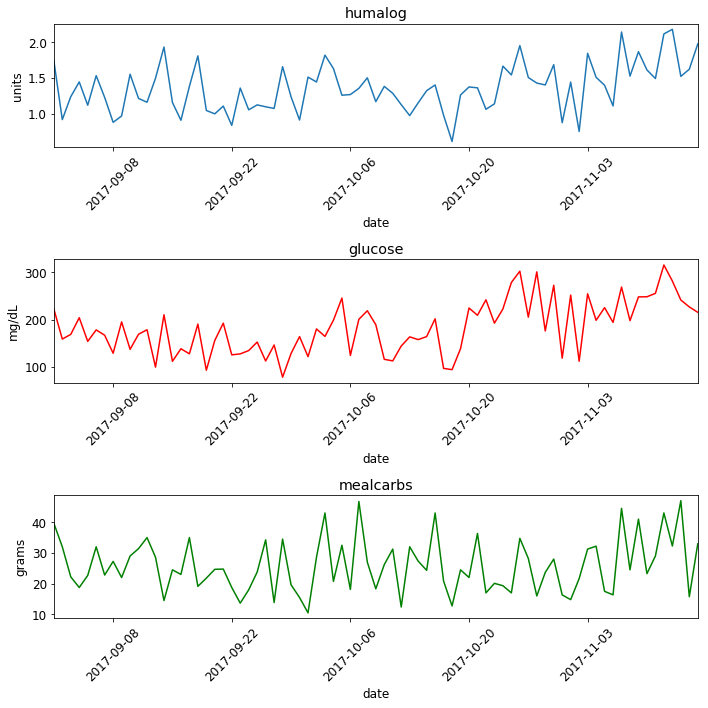

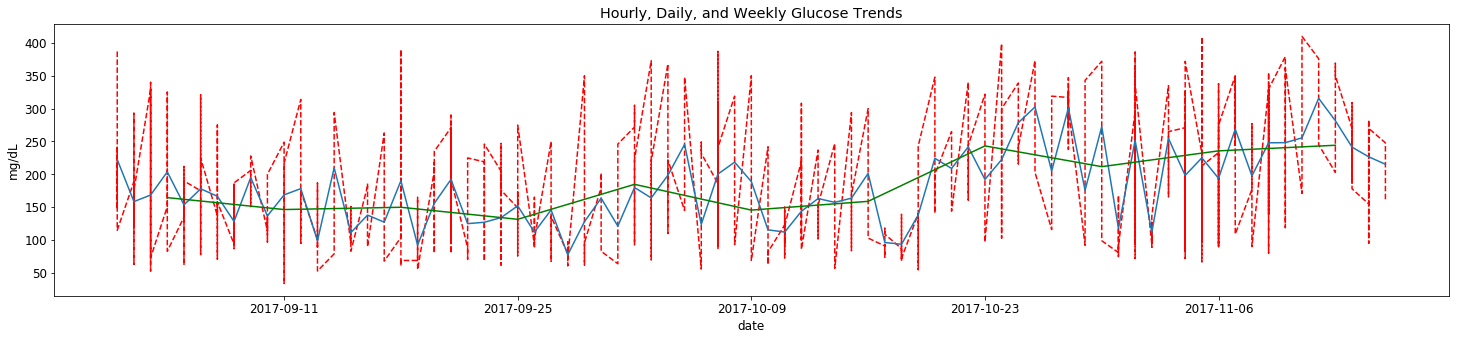

In [1022]:
df = pandas.read_csv('./combined_new.csv')
df = df.dropna(subset=['correcttimestamp'])
df['correcttimestamp']
start_date = time.mktime(time.strptime('9/1/2017', '%m/%d/%Y'))
end_date = time.mktime(time.strptime('11/17/2017', '%m/%d/%Y'))

df['unixtime'] = df['correcttimestamp'].apply(lambda x: time.mktime(time.strptime(x, '%m/%d/%Y %H:%M:%S')))
df = df[(df['unixtime'] > start_date) & (df['unixtime'] < end_date)].sort_values('unixtime')

df['date'] = df['unixtime'].apply(lambda x: date.fromtimestamp(x))

df = df.drop(df['humalog'].idxmax())


df['is_sugar'] = df['meal'] == 'sugar to treat'
df['is_breakfast'] = df['meal'] == 'breakfast'
df['is_lunch'] = df['meal'] == 'lunch'
df['is_dinner'] = df['meal'] == 'dinner'
df['30min_block'] = df['unixtime'] / (60 * 30)
df['hour_block'] = df['unixtime'] / (60 * 60)
df['30min_block'] = (df['30min_block'] - min(df['30min_block'])).apply(lambda x: math.floor(x))
df['hour_block'] = (df['hour_block'] - min(df['hour_block'])).apply(lambda x: math.floor(x))


df = df[['date', 'time', 'hour', 'hour_block', '30min_block', 'unixtime', 'mealcarbs', 'humalog', 'glucose', 'is_sugar', 'is_breakfast', 'is_lunch', 'is_dinner']]
df_to_plot = df.dropna(subset = ['glucose']).reset_index()
daily_means = df_to_plot.groupby('date')['mealcarbs', 'glucose', 'humalog'].mean()

weekly_means = df_to_plot

weekly_means['week'] = (df_to_plot['unixtime']).map(lambda x: datetime.fromtimestamp(x).replace(hour=0, minute=0, second=0, microsecond=0))
weekly_means['week'] = weekly_means['week'].map(lambda x: x - timedelta(days=x.weekday()))
weekly_means = weekly_means.groupby('week')['glucose', 'humalog', 'mealcarbs'].mean()
plt.rcParams.update({'font.size': 12})

plt.figure(figsize=(10,10))
plt.subplot(311)
plt.title('humalog')
plt.ylabel('units')
plt.xlabel('date')
daily_means['humalog'].plot(rot = 45)

plt.subplot(312)
plt.title('glucose')
plt.ylabel('mg/dL')
plt.xlabel('date')
daily_means['glucose'].plot(color='r', rot=45)

plt.subplot(313)
plt.title('mealcarbs')
plt.ylabel('grams')
plt.xlabel('date')
daily_means['mealcarbs'].plot(color='g', rot=45)
plt.tight_layout()
plt.show()

daily_means
plt.figure(figsize=(25, 5))
plt.title('Hourly, Daily, and Weekly Glucose Trends')
plt.plot(df_to_plot['date'] , df_to_plot['glucose'], 'r--')
plt.ylabel('mg/dL')
plt.xlabel('date')
plt.plot(daily_means['glucose'])
weekly_means = weekly_means[~pandas.isnull(weekly_means['glucose'])]
plt.plot(weekly_means['glucose'][1:], 'g-')


In [1016]:
df['humalog'][pandas.isnull(df['humalog'])] = 0
df['mealcarbs'][pandas.isnull(df['mealcarbs'])] = 0
df['glucose'].fillna(0, inplace=True)

In [1002]:
from sklearn.preprocessing import StandardScaler

glucose_scaler = StandardScaler()
glucose_scaler.fit(df['glucose'].reshape(-1, 1))
df['glucose_scaled'] = glucose_scaler.transform(df[['glucose']])

mealcarbs_scaler = StandardScaler()
mealcarbs_scaler.fit(df['mealcarbs'].reshape(-1, 1))
df['mealcarbs_scaled'] = mealcarbs_scaler.transform(df[['mealcarbs']])

humalog_scaler = StandardScaler()
humalog_scaler.fit(df['humalog'].reshape(-1, 1))
df['humalog_scaled'] = humalog_scaler.transform(df[['humalog']])
df

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':


,date,time,hour,hour_block,30min_block,unixtime,mealcarbs,humalog,glucose,is_sugar,is_breakfast,is_lunch,is_dinner,glucose_scaled,mealcarbs_scaled,humalog_scaled,30min_diff,30min_block_diff,glucose_category
629,2017-09-01,06:31 am,7,0,0,1.504247e+09,0.0,2.46,387.0,False,False,False,False,2.216430,-0.808288,2.021288,-11.0,11.0,2.0
628,2017-09-01,12:25 pm,12,5,11,1.504269e+09,36.0,1.31,147.0,False,False,True,False,-0.045700,0.969233,0.571112,-7.0,11.0,2.0
627,2017-09-01,03:49 pm,16,9,18,1.504281e+09,20.0,1.61,241.0,False,False,False,False,0.840301,0.179223,0.949419,-6.0,7.0,2.0
626,2017-09-01,06:38 pm,19,12,24,1.504291e+09,63.0,1.58,115.0,False,False,False,True,-0.347317,2.302373,0.911588,-13.0,6.0,1.0
625,2017-09-02,01:12 am,1,18,37,1.504315e+09,0.0,0.56,189.0,False,False,False,False,0.350173,-0.808288,-0.374655,-4.0,13.0,2.0
624,2017-09-02,03:03 am,3,20,41,1.504321e+09,0.0,0.00,149.0,False,False,False,False,-0.026849,-0.808288,-1.080828,-7.0,4.0,2.0
623,2017-09-02,06:51 am,7,24,48,1.504335e+09,0.0,0.00,120.0,False,False,False,False,-0.300189,-0.808288,-1.080828,-2.0,7.0,1.0
622,2017-09-02,07:41 am,8,25,50,1.504338e+09,38.0,1.75,138.0,False,True,False,False,-0.130529,1.067984,1.125962,-4.0,2.0,2.0
621,2017-09-02,10:00 am,10,27,54,1.504346e+09,0.0,0.00,293.0,False,False,False,False,1.330429,-0.808288,-1.080828,-7.0,4.0,2.0
620,2017-09-02,01:12 pm,13,30,61,1.504358e+09,52.0,1.25,85.0,False,False,True,False,-0.630083,1.759242,0.495450,-7.0,7.0,1.0


In [870]:
from sklearn.gaussian_process import GaussianProcessRegressor

#only grab the row with glucose measurements
only_glucose = df[df['glucose'] !=0]


In [1058]:
from sklearn.model_selection import train_test_split
import seaborn as sns

gaussian_x = only_glucose[['30min_block']]
gaussian_y = only_glucose['glucose']

gaussian_x
gaussian_y
x_train, x_test, y_train, y_test = train_test_split(gaussian_x, gaussian_y)


In [1044]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Instanciate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
d = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9, normalize_y=True).fit(gaussian_x, gaussian_y)

#d = GaussianProcessRegressor(normalize_y = True).fit(gaussian_x, gaussian_y)
x = np.atleast_2d(np.linspace(0, 10, 1000)).T
import numpy

d.fit(x_train, y_train)

#create a vector from 0 to max of '30min_block'
start_block = min(only_glucose['30min_block'])
end_block = max(only_glucose['30min_block'])

times = numpy.linspace(start=start_block, stop=end_block, num=end_block+1).reshape(-1, 1)
pred, sigma = d.predict(times, return_std=True)

times = times[:100]
pred = pred[:100]
sigma = sigma[:100]


only_first_100 = gaussian_x[gaussian_x['30min_block'] <100]
only_first_100_y = gaussian_y[:len(only_first_100)]


print(np.concatenate([pred - 1.9600 * 100* sigma,
                        (pred + 1.9600 * 50 * sigma)[::-1]]))
print(np.concatenate([times, times[::-1]]))

/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 143, 'grad': array([  1.39586413e+10,  -0.00000000e+00]), 'warnflag': 2, 'nit': 8}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 62, 'grad': array([  6.43827137e+07,  -8.71363316e+00]), 'warnflag': 2, 'nit': 10}
  " state: %s" % convergence_dict)
/usr/local/lib/python3.5/dist-packages/sklearn/gaussian_process/gpr.py:457: UserWarning: fmin_l_bfgs_b terminated abnormally with the  state: {'task': b'ABNORMAL_TERMINATION_IN_LNSRCH', 'funcalls': 70, 'grad': array([-2608899.80882757,  -890844.55075297]), 'warnflag': 2, 'nit': 3}
  " state: %s" % convergence_dict)


ValueError: Found array with dim 3. Estimator expected <= 2.

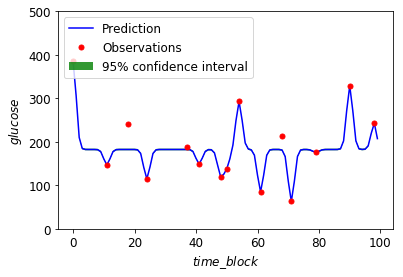

In [1059]:
fig = plt.figure()
plt.plot(times, pred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([times, times[::-1]]),
         np.concatenate([pred - 1.9600 * sigma,
                        (pred + 1.9600 * sigma)[::-1]]),
         alpha=.8, fc='g', ec='None', label='95% confidence interval')
plt.plot(only_first_100, only_first_100_y, 'r.', markersize=10, label=u'Observations')

plt.xlabel('$time\_block$')
plt.ylabel('$glucose$')
plt.ylim(0, 500)
plt.legend(loc='upper left')

In [1075]:
#foreach glucose measurement, get the last 24 hours of samples
#array_samples
#the glucose indexes are what we are going to predict
import keras
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

length_30_min = max(df['30min_block'] + 1)
length_hour = max(df['hour_block'] + 1)
#0.0	2.46	387.0	False	False	False	False
#mealcarbs, humalog, glucose, is_sugar, is_breakfast, is_lunch, is_dinner
depth = 4
import numpy as np
results = np.zeros((length_hour, depth))
#iterate through df
glucose_indexes = []
df.reset_index()
df.reindex(index=df.index[::-1])

for idx, row in df.iterrows():
    glucose_category = 2
    if row['glucose'] > 130:
        df.loc[idx, 'glucose_category'] = 2
    elif row['glucose'] < 70:
        df.loc[idx, 'glucose_category'] = 0
    else:
        df.loc[idx, 'glucose_category'] = 1
    try:
        df.loc[idx, '30min_block_diff'] = df.loc[idx, '30min_block'] - df.loc[idx+1, '30min_block']
    except:
        print(idx)

for index, row in df.iterrows():
    #just try and predict lunch from breakfast?
    if (row['glucose'] != 0):
        glucose_indexes.append(row['hour_block'])
    #results[index] = row[['mealcarbs_scaled','humalog_scaled','glucose_scaled', 'is_sugar','is_breakfast', 'is_lunch', 'is_dinner']]
    results[row['hour_block']] = row[['mealcarbs','humalog','glucose', 'glucose_category']]

629
411


In [1076]:
df

,date,time,hour,hour_block,30min_block,unixtime,mealcarbs,humalog,glucose,is_sugar,is_breakfast,is_lunch,is_dinner,glucose_category,30min_block_diff
629,2017-09-01,06:31 am,7,0,0,1.504247e+09,NaN,2.46,387.0,False,False,False,False,2.0,NaN
628,2017-09-01,12:25 pm,12,5,11,1.504269e+09,36.0,1.31,147.0,False,False,True,False,2.0,11.0
627,2017-09-01,03:49 pm,16,9,18,1.504281e+09,20.0,1.61,241.0,False,False,False,False,2.0,7.0
626,2017-09-01,06:38 pm,19,12,24,1.504291e+09,63.0,1.58,115.0,False,False,False,True,1.0,6.0
625,2017-09-02,01:12 am,1,18,37,1.504315e+09,NaN,0.56,189.0,False,False,False,False,2.0,13.0
624,2017-09-02,03:03 am,3,20,41,1.504321e+09,NaN,NaN,149.0,False,False,False,False,2.0,4.0
623,2017-09-02,06:51 am,7,24,48,1.504335e+09,NaN,NaN,120.0,False,False,False,False,1.0,7.0
622,2017-09-02,07:41 am,8,25,50,1.504338e+09,38.0,1.75,138.0,False,True,False,False,2.0,2.0
621,2017-09-02,10:00 am,10,27,54,1.504346e+09,NaN,NaN,293.0,False,False,False,False,2.0,4.0
620,2017-09-02,01:12 pm,13,30,61,1.504358e+09,52.0,1.25,85.0,False,False,True,False,1.0,7.0


In [1077]:
# feed in last 24 hours of measurments
last_24 = 24*2
last_12 = 12

final_glucose_indexes = []
for i, glucose_index in enumerate(glucose_indexes):
    if (glucose_index-last_12 > 0):
        final_glucose_indexes.append(glucose_index)
print(len(final_glucose_indexes))
y = np.zeros((len(final_glucose_indexes)))
x = np.zeros((len(final_glucose_indexes), 12, 3))
glucose_category = np.zeros((len(final_glucose_indexes)))

for i, glucose_index in enumerate(final_glucose_indexes):
    x[i, :, :] = np.array(results[glucose_index-last_12:glucose_index, :3])
    y[i] = results[glucose_index][2]
    glucose_category[i] = results[glucose_index][3]


590


In [1078]:
len(x)

590

In [1079]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
#input_shape = (len(x_train[0]), len(x_train[0][0]))
print(len(x_train))
print(len(x_test))

442
148


In [1082]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, Flatten, Input

model = Sequential()
model.add(Flatten(input_shape=(12, 3)))
model.add(Dense(100, activation='relu'))
#model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss='mse',
              optimizer='Adam')
print(model.input_shape)
print(model.output_shape)
print(x_train.shape)
print(model.summary())

(None, 12, 3)
(None, 1)
(442, 12, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_81 (Flatten)         (None, 36)                0         
_________________________________________________________________
dense_221 (Dense)            (None, 100)               3700      
_________________________________________________________________
dense_222 (Dense)            (None, 100)               10100     
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 101       
Total params: 13,901
Trainable params: 13,901
Non-trainable params: 0
_________________________________________________________________
None


In [1065]:
model.fit(x=np.array(x_train), y=np.array(y_train), validation_data=(np.array(x_test), np.array(y_test)), epochs=100)
x_train.shape
y_train.shape
print(len(x))

ValueError: Error when checking input: expected flatten_78_input to have 3 dimensions, but got array with shape (375, 1)

In [1010]:
model.evaluate(x=x_test, y=y_test)
predictions = model.predict(x_test)
print(predictions)
print(y_test)

ValueError: Error when checking input: expected flatten_68_input to have 3 dimensions, but got array with shape (1,)